In [45]:
import numpy as np
import os
import matplotlib.pyplot as plt
import importlib

#Get some functions from external file
current_dir = os.getcwd()
os.chdir(r"C:\Users\sjefs\Desktop\AMAS\Functions")     # Direct to external module
import AMAS_functions as AMAS
importlib.reload(AMAS)
os.chdir(current_dir)

# Exercise 1

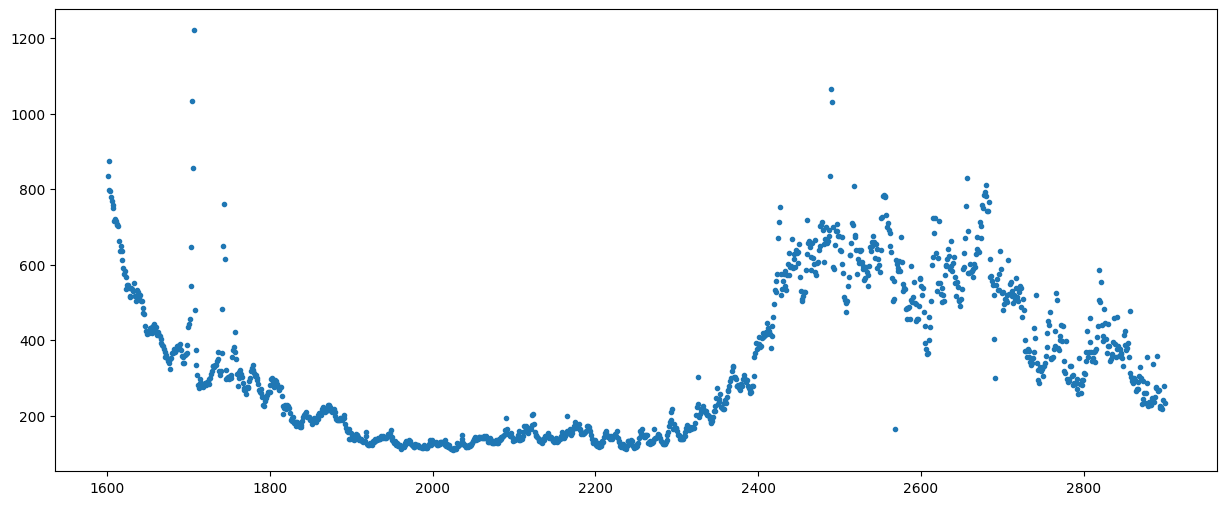

In [2]:
x, y = np.loadtxt("DustLog_forClass.dat.txt").T
plt.figure(figsize = (15,6))
plt.plot(x, y, ".")


## Simplify data with knotter:

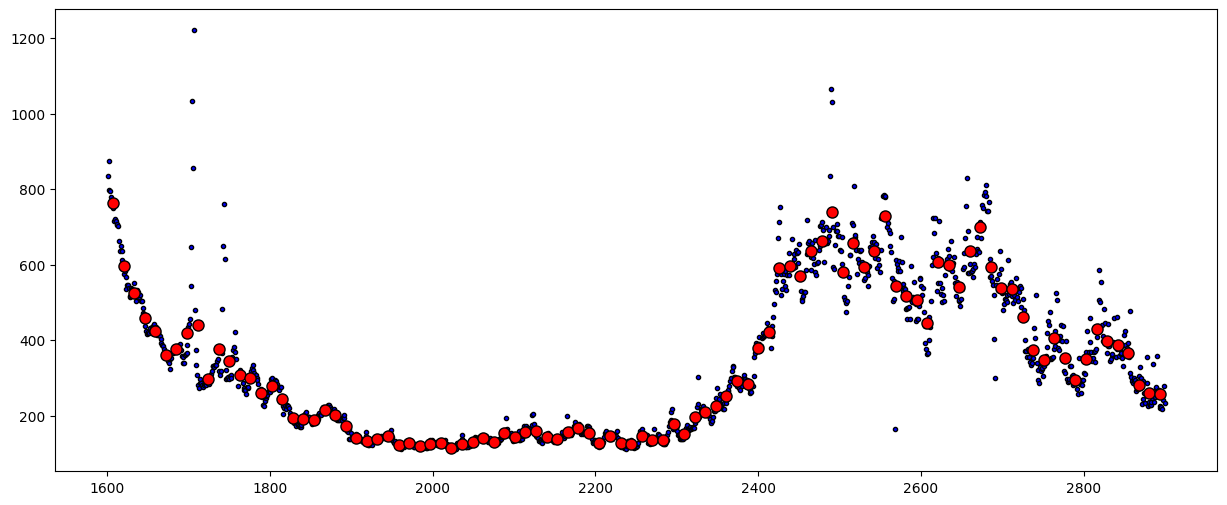

In [3]:
X, Y = AMAS.knotter(x, y, N = 100)
plt.figure(figsize = (15,6))
plt.plot(x, y, "b.", markeredgecolor = "black")
plt.plot(X, Y, 'o', color = "red", markersize = 8, markeredgecolor = "black")


# Create splines

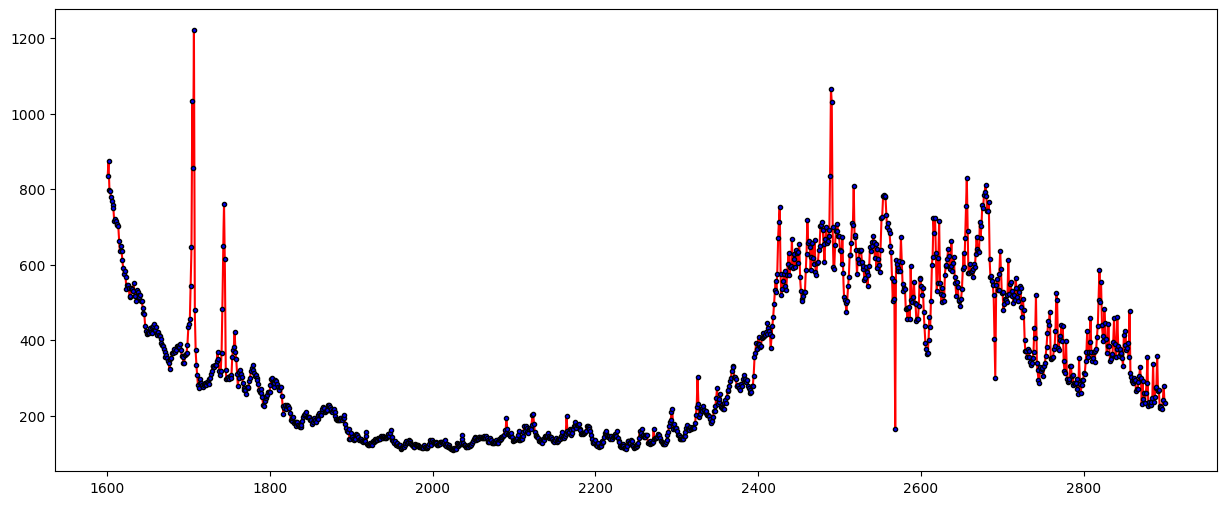

In [ ]:

def spliner(x, y, N = 10, scale = None):
    """
    Function that creates splines from 1D dataset. 
    You can either specify the number of extra points betwen each datapoint,
    or you can specify a scale factor for the total number of points.

    Parameters:
        x: array, x-values of data
        y: array, y-values of data
        N: int, number of points between each data point
        scale: float, scale factor for the number of points

    Returns:
        result_x, result y: tuple of arrays, x and y values of the spline
    """
    if scale != None:
        N = int(len(x)*scale)
        
    result_y = np.array([])
    result_x = np.array([])
    for i in range(len(x)-1):
        # Get the two points
        x_0, x_1 = x[i], x[i+1]
        y_0, y_1 = y[i], y[i+1]

        # Calculate the slope and the line
        diff_1 = (y_1 - y_0)/(x_1 - x_0)
        x_out = np.linspace(x_0, x_1, N)
        y_out = y_0 + diff_1*(x_out - x_0)

        # Append to the result
        result_x = np.append(result_x, x_out)
        result_y = np.append(result_y, y_out)

    return result_x, result_y

plt.figure(figsize = (15,6))
X, Y = spliner(x, y, N = 100)
plt.plot(X, Y, color = "red", markersize = 8, markeredgecolor = "black")
plt.plot(x, y, "b.", markeredgecolor = "black")

### Sketch code for quadratic splines based on finite difference. DOES NOT WORK YET
The idea:

We want to force a function $f(x) = ax^2 + bx + c$ on all points x between $x_0$ and $x_1$. We write the differences:

$\begin{equation}
f' = 2ax + b = \frac{y_1-y_0}{x_1-x_0}
\end{equation}$

$\begin{equation}
f'' = 2a  = \frac{y_{-1} + y_1 - 2y_0}{(x_1-x_0)^2}
\end{equation}$

This way:
$\begin{equation}
a = f''/2
\end{equation}$

$\begin{equation}
b = f' - f''x
\end{equation}$

$\begin{equation}
c = y_0 - ax_0^2 - b_x0
\end{equation}$

and finally:
$\begin{equation}
f(x) = ½ f''x^2 + f' - f''x + c
\end{equation}$

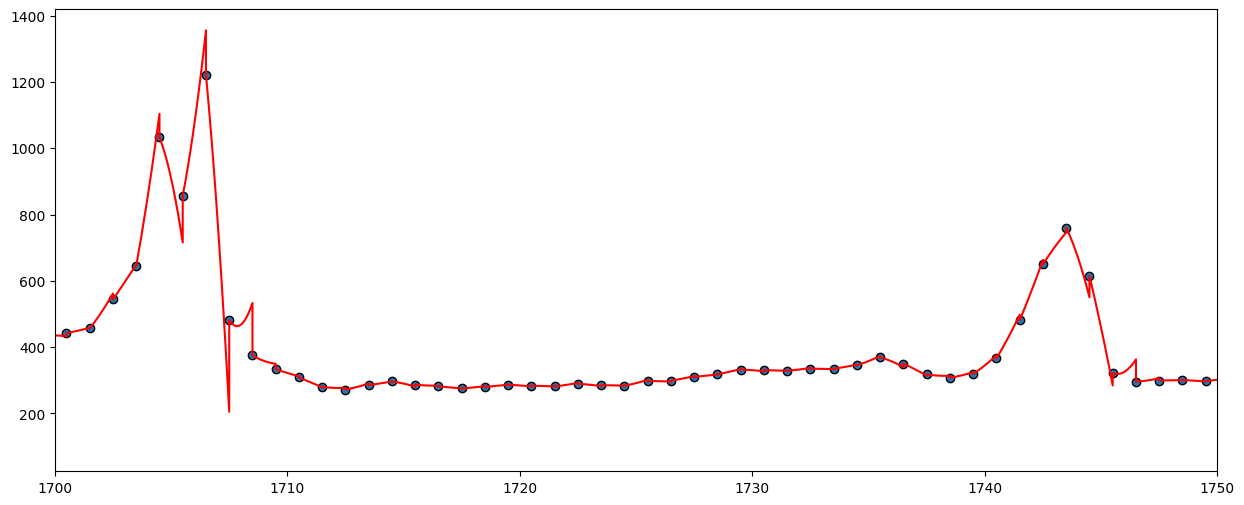

In [ ]:
# Sketch
        
result_y = np.array([])
result_x = np.array([])
for i in range(1, len(x)-1):
    # Get the the three points around x_i (for central scheme finite difference)
    x_0, x_1 = x[i], x[i+1]
    y_0, y_1 = y[i], y[i+1]
    x_m, y_m = x[i-1], y[i-1]

    # Calculate the first and second derivatives at x_i
    diff_1 = (y_1 - y_0)/(x_1 - x_0)
    diff_2 = (y_m + y_1 - 2*y_0)/(2*(x_1 - x_0)**2)

    # Calculate the quadratic function
    x_out = np.linspace(x_0, x_1, 10)
    a = diff_2/2
    b = diff_1 - diff_2*x_0
    c = y_0 - diff_1*x_0 + diff_2*x_0**2/2
    y_out = a*x_out**2 + b*x_out + c

    # Append to the result
    result_x = np.append(result_x, x_out)
    result_y = np.append(result_y, y_out)


plt.figure(figsize = (15,6))
plt.plot(x, y, 'o', markeredgecolor = "black")
plt.xlim(1700, 1750)
plt.plot(result_x, result_y, color = "red")


# Attempt two setting up system of linear equations
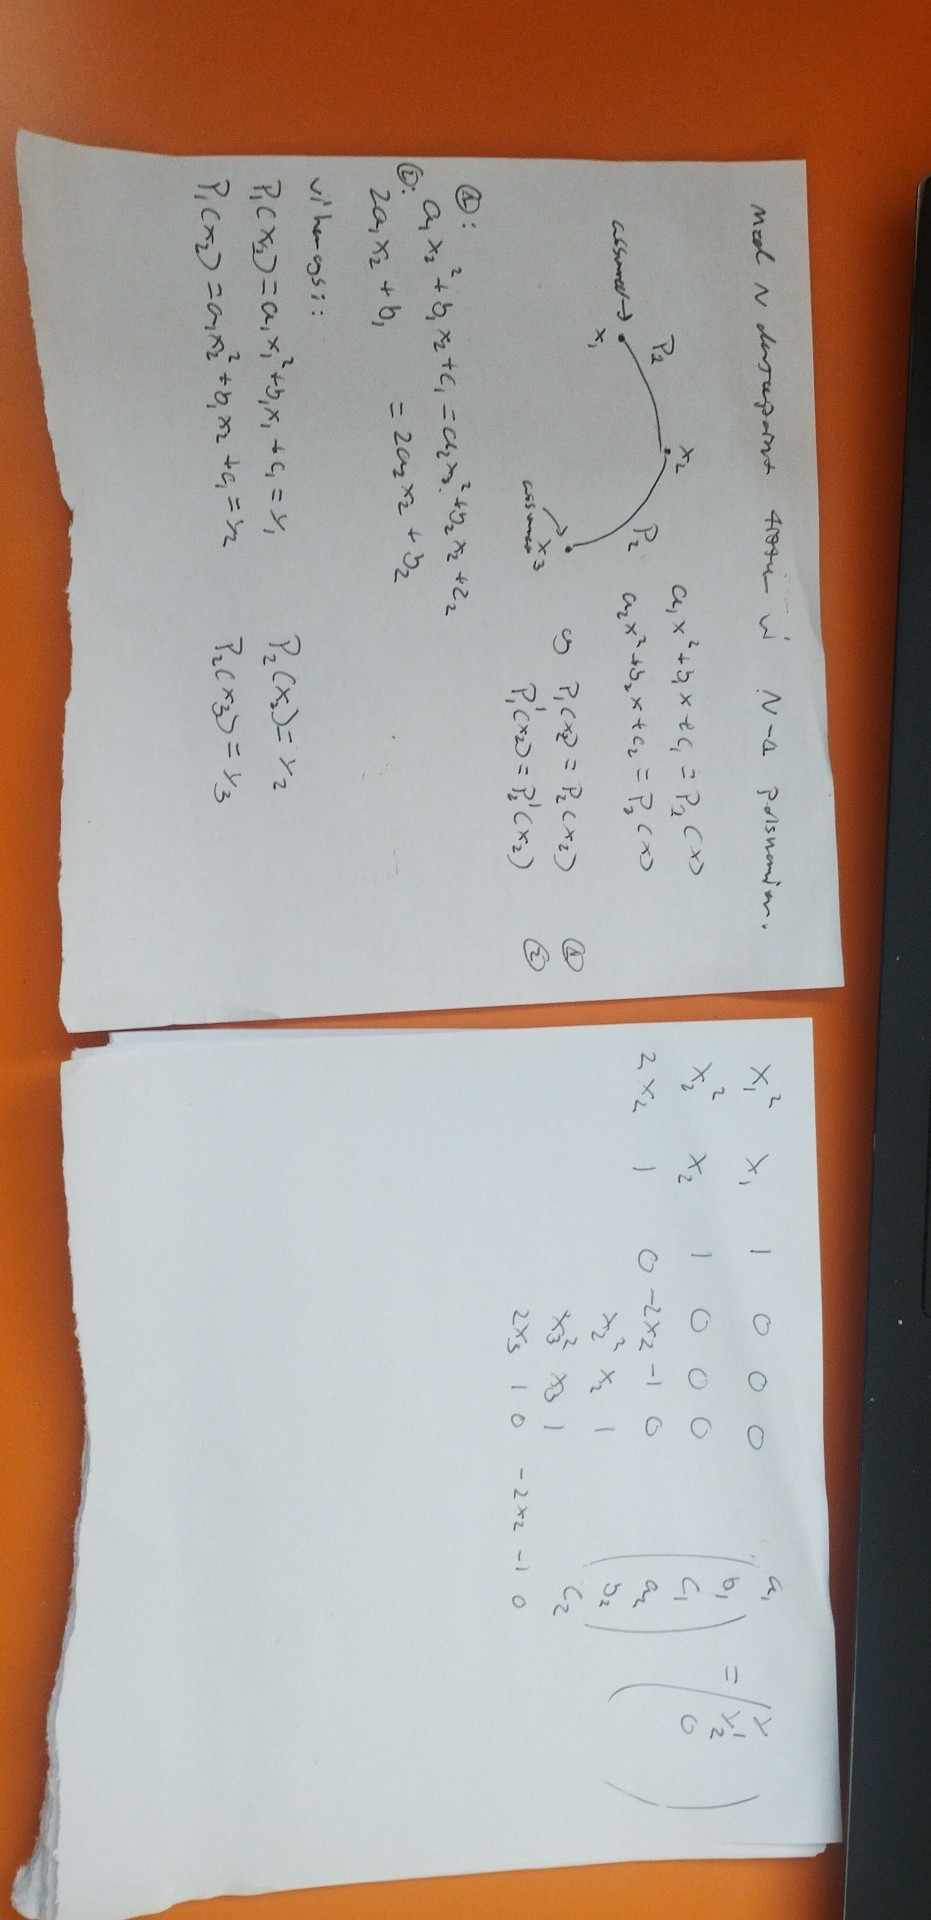

In [ ]:
M = np.zeros((len(x)*3, len(x)*3))

for row in range(int(len(M)/3)-1):

    # First line
    to_append = np.zeros(len(M))
    to_append[row*3] = x[row]**2
    to_append[row*3 + 1] = x[row]
    to_append[row*3 + 2] = 1
    M[row*3] = to_append

    # Second line
    to_append = np.zeros(len(M))
    to_append[row*3] = x[row+1]**2
    to_append[row*3 + 1] = x[row+1]
    to_append[row*3 + 2] = 1
    M[3*row + 1] = to_append

    # Third line
    to_append = np.zeros(len(M))
    to_append[row*3] = 2*x[row]
    to_append[row*3 + 1] = 1
    to_append[row*3 + 2] = 0
    to_append[row*3 + 3] = -2*x[row]
    to_append[row*3 + 4] = -1
    to_append[row*3 + 5] = 0
    M[3*row + 2] = to_append


b = np.zeros(len(x)*3)

for i in range(len(x)-1):
    b[3*i] = y[i]
    b[3*i + 1] = y[i+1]
    b[3*i + 2] = 0


#solve with pseudo inverse
M_inv = np.linalg.pinv(M)
a = np.dot(M_inv, b)

# Using library functions

(1700.0, 1750.0)

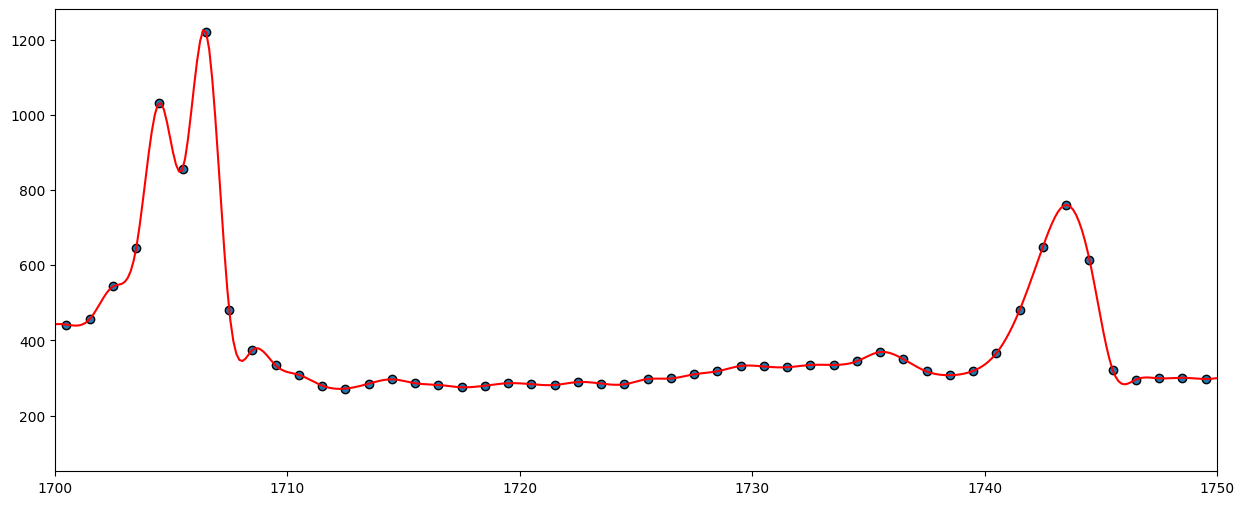

In [18]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(x, y)
xs = np.linspace(min(x), max(x), 10000)
plt.figure(figsize = (15,6))
plt.plot(x, y, 'o', markeredgecolor = "black")
plt.plot(xs, cs(xs, 0), color = "red")
plt.xlim(1700, 1750)


# Exercise 2

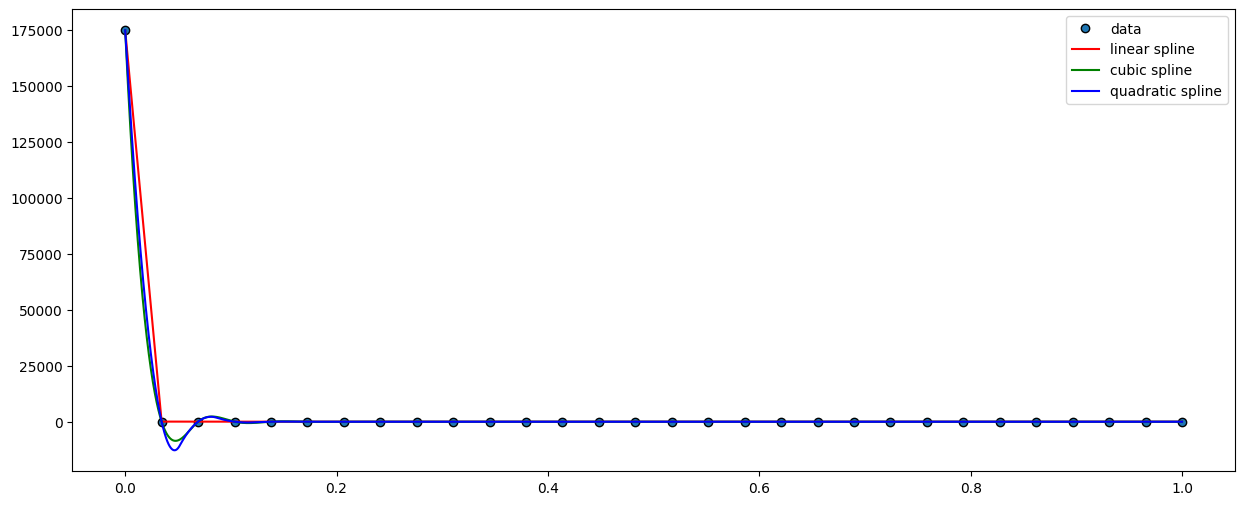

In [47]:
x, y = np.loadtxt("SplineCubic.txt").T
x_lin, y_lin = AMAS.spliner(x, y, N = 100, kind = 'linear')

#Quadratic splines
from scipy.interpolate import CubicSpline
cubic_spline = AMAS.spliner(x, y, kind = 'cubic', return_function = True)
x_cube = np.linspace(min(x), max(x), 10000)
y_cube = cubic_spline(x_cube, 0)

from scipy.interpolate import interp1d
quad_spline = AMAS.spliner(x, y, kind = 'quadratic', return_function = True)
x_quad = np.linspace(min(x), max(x), 10000)
y_quad = quad_spline(x_quad)


plt.figure(figsize = (15,6))
plt.plot(x, y, 'o', markeredgecolor = "black", label = "data")
plt.plot(x_lin, y_lin, color = "red", label = "linear spline")
plt.plot(x_cube, y_cube, color = "green", label = "cubic spline")
plt.plot(x_quad, y_quad, color = "blue", label = "quadratic spline")
plt.legend()

# Exercise 3

(0.0, 1.0)

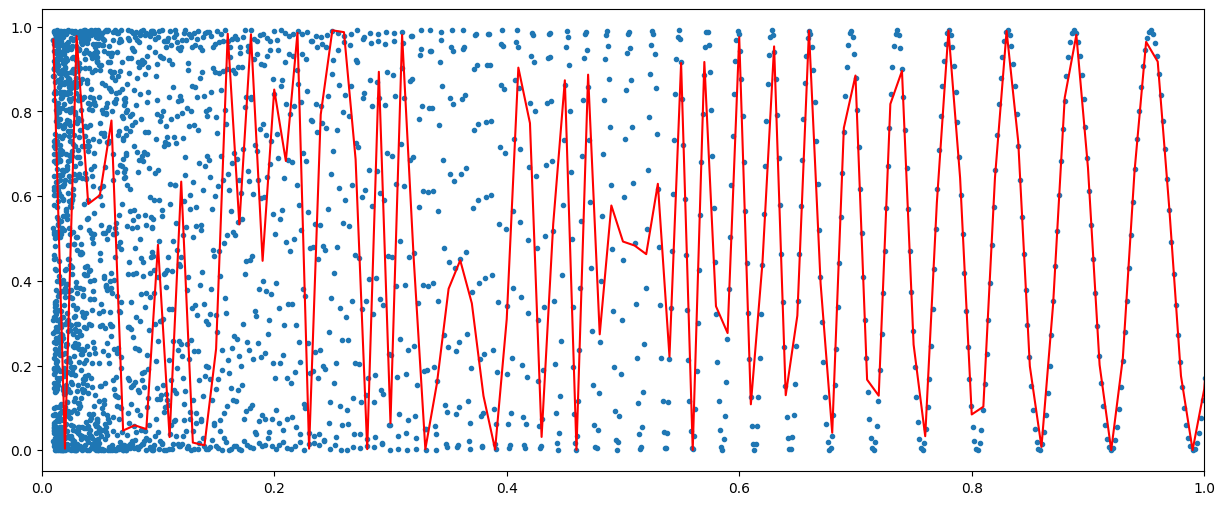

In [65]:
x, y = np.loadtxt("SplineOsc1.txt" ).T

plt.figure(figsize = (15,6))
plt.plot(x, y, '.')
f_cube = AMAS.spliner(x, y, kind = 'cubic', return_function = True)
plt.plot(x_cube, f_cube(x_cube), color = "red")
plt.xlim(0, 1)